Let us label the cells where the adversary can move below as cells 1 through 8. Cell number 6 is the starting cell for our adversary. The adversary can only randomly move to its adjacent cells.

In [4]:
import numpy as np
Game_Grid = []
Game_Grid_Inv = []
rewards = [(7,1),(1,7)]
maze_size = 9
for reward in rewards: 
    
    game_grid = np.zeros((maze_size,maze_size))
    
    game_grid[reward[0]-1, reward[1]-1] = 1  #State 1
    game_grid[reward[0]-1, reward[1]] = 2  #State 2
    game_grid[reward[0]-1, reward[1]+1] = 3  #State 3
    game_grid[reward[0], reward[1]-1] = 4  #State 4
    game_grid[reward[0], reward[1]+1] = 5  #State 5
    game_grid[reward[0]+1, reward[1]-1] = 6  #State 6
    game_grid[reward[0]+1, reward[1]] = 7  #State 7
    game_grid[reward[0]+1, reward[1]+1] = 8  #State 8
    Game_Grid.append(game_grid) 
    
    game_grid_inv={}

    game_grid_inv[1]=(reward[0]-1,reward[1]-1)
    game_grid_inv[2]=(reward[0]-1,reward[1])
    game_grid_inv[3]=(reward[0]-1,reward[1]+1)
    game_grid_inv[4]=(reward[0],reward[1]-1)
    game_grid_inv[5]=(reward[0],reward[1]+1)
    game_grid_inv[6]=(reward[0]+1,reward[1]-1)
    game_grid_inv[7]=(reward[0]+1,reward[1])
    game_grid_inv[8]=(reward[0]+1,reward[1]+1)
    Game_Grid_Inv.append(game_grid_inv)
    
Game_Grid

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 2., 3., 0., 0., 0., 0., 0., 0.],
        [4., 0., 5., 0., 0., 0., 0., 0., 0.],
        [6., 7., 8., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 1., 2., 3.],
        [0., 0., 0., 0., 0., 0., 4., 0., 5.],
        [0., 0., 0., 0., 0., 0., 6., 7., 8.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])]

In [5]:
Game_Grid_Inv

[{1: (6, 0),
  2: (6, 1),
  3: (6, 2),
  4: (7, 0),
  5: (7, 2),
  6: (8, 0),
  7: (8, 1),
  8: (8, 2)},
 {1: (0, 6),
  2: (0, 7),
  3: (0, 8),
  4: (1, 6),
  5: (1, 8),
  6: (2, 6),
  7: (2, 7),
  8: (2, 8)}]

Trans_Matrix will be our transition probability matrix for the adversary.

In [6]:
m = np.sum(Game_Grid[0] > 0)
Trans_Matrix = np.zeros((m, m))
Trans_Matrix[0,1] = .5
Trans_Matrix[0,3] = .5
Trans_Matrix[1,0] = .5
Trans_Matrix[1,2] = .5
Trans_Matrix[2,1] = .5
Trans_Matrix[2,4] = .5
Trans_Matrix[3,0] = .5
Trans_Matrix[3,5] = .5
Trans_Matrix[4,2] = .5
Trans_Matrix[4,7] = .5
Trans_Matrix[5,3] = .5
Trans_Matrix[5,6] = .5
Trans_Matrix[6,5] = .5
Trans_Matrix[6,7] = .5
Trans_Matrix[7,4] = .5
Trans_Matrix[7,6] = .5
#Trans_Matrix = np.linalg.inv(Trans_Matrix)
Trans_Matrix

array([[0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0.5, 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5],
       [0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ]])

In [7]:
from gurobipy import *
from itertools import combinations 
import networkx as nx
import numpy as np

def Manhattan_Distance(x,y):
    return np.abs(x[0]-y[0])+np.abs(x[1]-y[1])

## Construct network
grid_dimension=maze_size
G=nx.Graph()
for i in range(grid_dimension):
    for j in range(grid_dimension):
        G.add_node((i,j))
        
for (i,j) in combinations(G.nodes(),2):
     if Manhattan_Distance(i,j)<=1:
            G.add_edge(i,j)
pos={}
for i in G.nodes():
    pos[i]=(int(i[0]), maze_size-int(i[1]))
    
nx.draw(G,pos)

/Users/madeleine/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [8]:
starting_agent_location=(0,0)
for i in G.nodes():
    G.nodes[i]['current_agent']=False
    for j in range(0,len(rewards)):
        current_adversary = 'current_adversary' + str(j)
        G.nodes[i][current_adversary] = False
        reward = 'reward'+ str(j)
        G.nodes[i][reward] = False
        possible_adversary = 'possible_adversary' + str(j)
        G.nodes[i][possible_adversary] = False
for j in range(0,len(rewards)):
    reward = 'reward'+ str(j)
    G.nodes[rewards[j]][reward]=True
    possible_adversary = 'possible_adversary' + str(j)
    G.nodes[rewards[j][0]-1,rewards[j][1]-1][possible_adversary] = True
    G.nodes[rewards[j][0]-1,rewards[j][1]][possible_adversary] = True
    G.nodes[rewards[j][0]-1,rewards[j][1]+1][possible_adversary] = True
    G.nodes[rewards[j][0],rewards[j][1]+1][possible_adversary] = True
    G.nodes[rewards[j][0]+1,rewards[j][1]+1][possible_adversary] = True
    G.nodes[rewards[j][0]+1,rewards[j][1]][possible_adversary] = True
    G.nodes[rewards[j][0]+1,rewards[j][1]-1][possible_adversary] = True
    G.nodes[rewards[j][0],rewards[j][1]-1][possible_adversary] = True
    

G.nodes[starting_agent_location]['current_agent']=True
for j in range(0,len(rewards)):
    current_adversary = 'current_adversary' + str(j)
    G.nodes[rewards[j][0]-1,rewards[j][1]-1][current_adversary]=True




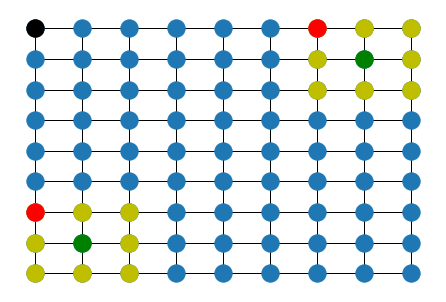

In [9]:
nx.draw(G,pos)
nx.draw_networkx_nodes(G, pos, nodelist=[i for i in G.nodes() if i==starting_agent_location], node_color='black') 
for j in range(0,len(rewards)):
    reward = 'reward' + str(j)
    nx.draw_networkx_nodes(G, pos, nodelist=[i for i in G.nodes() if G.nodes[i][reward]], node_color='g')    
    possible_adversary = 'possible_adversary' + str(j)
    nx.draw_networkx_nodes(G, pos, nodelist=[i for i in G.nodes() if G.nodes[i][possible_adversary]], node_color='y')
    current_adversary = 'current_adversary' + str(j)
    nx.draw_networkx_nodes(G, pos, nodelist=[i for i in G.nodes() if G.nodes[i][current_adversary]], node_color='r')

### Set definitions

In [10]:
starting_agent_location=(0,0)
dest=(maze_size-1,maze_size-1)
T=maze_size*maze_size
done=False
captured=[False]*len(rewards)
maxReward=100

current_agent_location=starting_agent_location
current_adversary_location = []
for i in range(0,len(rewards)):
    current_adversary_location.append((rewards[i][1]-1,rewards[i][0]-1))
current_time=0


### Main online optimization

Current agent location: (0, 0)
Current adversary location: [(0, 6), (6, 0)]
Current agent location: (0, 1)
Current adversary location: [(1, 6), (6, 1)]
Current agent location: (0, 2)
Current adversary location: [(0, 6), (6, 0)]
Current agent location: (1, 2)
Current adversary location: [(1, 6), (7, 0)]
Current agent location: (2, 2)
Current adversary location: [(2, 6), (8, 0)]
Current agent location: (2, 1)
Current adversary location: [(1, 6), (7, 0)]
Current agent location: (2, 2)
Current adversary location: [(0, 6), (8, 0)]
Current agent location: (2, 1)
Current adversary location: [(1, 6), (7, 0)]
Current agent location: (3, 1)
Current adversary location: [(2, 6), (8, 0)]
Current agent location: (4, 1)
Current adversary location: [(2, 7), (7, 0)]
Current agent location: (4, 2)
Current adversary location: [(2, 8), (6, 0)]
Current agent location: (5, 2)
Current adversary location: [(2, 7), (6, 1)]
Current agent location: (5, 3)
Current adversary location: [(2, 6), (6, 0)]
Current agen

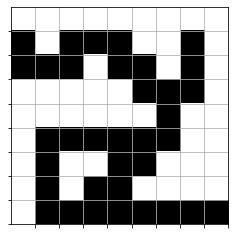

In [12]:
import time
start_time = time.time()
import random
from collections import Counter
reward = {}
importance=100000
n_success = 0
total_reward = 0
total_regret = 0
average_agent_heatmap = {}
for j in range(0,maze_size):
    for k in range(0,maze_size):
        average_agent_heatmap[(j,k)] = 1

for e in range(2):
    agent_heatmap = {}
    for j in range(0,maze_size):
        for k in range(0,maze_size):
            agent_heatmap[(j,k)] = 0
    reward[e] = 0
    done=False
    captured=[False]*len(rewards)
    current_agent_location=starting_agent_location
    current_adversary_location = []  
    for i in range(0,len(rewards)):
        current_adversary_location.append((rewards[i][1]-1,rewards[i][0]-1))
    current_time=0
    while True:
        #print("Current Time:" + str(current_time))
        ####################
        ##Printing details##
        ####################
        current_adversary_loc = []
        for z in range(0,len(rewards)):
            current_adversary_loc.append(int(Game_Grid[z][current_adversary_location[z][1],current_adversary_location[z][0]]))
        print("Current agent location: "+str(current_agent_location))
        print("Current adversary location: "+str(current_adversary_location))
        #print("Current adversary loc:" + str(current_adversary_loc))
        #print("Current time: "+str(current_time))
        
        agent_heatmap[(current_agent_location[1],current_agent_location[0])] -= .2


        for z in range(0,len(rewards)):
            if current_agent_location==current_adversary_location[z]:
                #print("Captured Reward "+str(z))
                break
        if done==True:
            average_agent_heatmap = Counter(average_agent_heatmap) + Counter(agent_heatmap)
            n_success += 1
            total_reward += reward[e]
            total_regret += (475-reward[e])
            #print("Successful")
            break

        ######################
        ##Setting up rewards##
        ######################
        #print("captured:"+str(captured))
        if all(captured):
            destination=dest
        else:
            #rew = random.choice((np.where(np.array((captured))==False)[0]))
            #print(captured)
            rew = (np.where(np.array((captured))==False)[0])[0]
            destination = (rewards[rew][0],rewards[rew][1])
        #print("destination:"+ str(destination))
        r={}
        for (i,d) in G.nodes(data=True):
            r[i] = 0
        for z in range(0,len(rewards)):
            for (i,d) in G.nodes(data=True):
                if d['reward'+str(z)]==True and not captured[z]:
                    r[i]=maxReward

        ########################
        ##Setting up penalties##
        ########################
        p={}
        for (i,d) in G.nodes(data=True):
            p[i]={}
            p[i][current_time]=0

        for t in range(current_time, T):
            for (i,d) in G.nodes(data=True):
                p[i][t]=0
        for t in range(current_time, T):
            for z in range(0,len(rewards)):
                original_probabilities = np.linalg.matrix_power(Trans_Matrix, t+1-current_time)[current_adversary_loc[z]-1,] # probabilities using matrix power function 
                #for (i,d) in G.nodes(data=True):
                #    if d['possible_adversary'+str(z)]==True:
                #        p[i][t]=original_probabilities[int(Game_Grid[z][i[1]][i[0]])-1]
                for i, e in enumerate(list(original_probabilities)):
                    if e != 0:
                        p[(Game_Grid_Inv[z][i+1][1],Game_Grid_Inv[z][i+1][0])][t] = original_probabilities[i]
                        print(i,t,p[i][t])
        

        ####################
        ##Setting up model##
        ####################          
        model=Model("model_time"+str(current_time))
        model.setParam('OutputFlag', 0) 
        x={}
        y={}
        for i in G.nodes():
            y[i]={}
            y[i][current_time]=model.addVar(vtype=GRB.BINARY, name="y"+str(i)+","+str(t))
            for t in range(current_time, T):
                y[i][t+1]=model.addVar(vtype=GRB.BINARY,obj=t-r[i]+importance*p[i][t], name="y"+str(i)+","+str(t))
        for (i,j) in G.edges():
            x[i,j]={}
            x[j,i]={}
            for t in range(current_time, T):
                x[i,j][t]=model.addVar(vtype=GRB.BINARY, name="x"+str(i)+","+str(j)+","+str(t))
                x[j,i][t]=model.addVar(vtype=GRB.BINARY, name="x"+str(j)+","+str(i)+","+str(t))


        ################################
        ## Setting up the constraints ##
        model.addConstr(y[current_agent_location[0], current_agent_location[1]][current_time]==1) 
        ################################

        # agent only be at one node at a time
        for t in range(current_time, T):
            #print("time:"+str(t))
            model.addConstr(quicksum(y[i[0],i[1]][t] for i in G.nodes()) <= 1)

        # agent can only be in each node once when planning
        for i in G.nodes():
            model.addConstr(quicksum(y[i[0],i[1]][t] for t in range(current_time,T)) <= 1)

        # The agent can and will only exit from the node it is currently in
        for i in G.nodes():
            for t in range(current_time+1, T):
                model.addConstr(quicksum(x[j,i][t-1] for j in G[i])==y[i][t])

        # When an agent enters a node it must exit it as well
        for i in G.nodes():
            if i!=destination and i!=current_agent_location:
                for t in range(current_time+1, T):
                    model.addConstr(quicksum(x[j,i][t-1] for j in G[i])==quicksum(x[i,j][t] for j in G[i]))#, name=str(i))

        # agent has to move every step
        model.addConstr(quicksum(x[current_agent_location, j][current_time] for j in G[current_agent_location])==1)

        #have to reach destination(might not be needed)
        expr=LinExpr()
        for j in G[destination]:
            for t in range(current_time, T):
                expr+=x[j, destination][t]
        model.addConstr(expr==1)

        #model.write("myModel"+str(current_time)+".lp")

        model.optimize()
        next_location=-1
        for t in range(current_time, T):
            for (i,j) in G.edges():
                if x[i,j][t].X==1:
                    print(t)
                    print(i,j)
                    if t==current_time:
                        next_location=j
                if x[j,i][t].X==1:
                    print(t)
                    print(j,i)
                    if t==current_time:
                        next_location=i
        for i in G.nodes():
            if y[i][current_time].X==1:
                #print(i)
                continue

        current_agent_location=next_location 

        #print("Next agent location: " + str(next_location))
        for (i,d) in G.nodes(data=True):
            for z in range(0,len(rewards)):
                if d['reward'+str(z)]==True:
                    if str(i)==str(next_location):
                        captured[z]=True
                        print("Just captured reward " + str(z))



        current_time+=1

        ### THIS IS THE PART THAT NEEDS UPDATING ########
        from random import choices
        next_adversary_location = []
        for z in range(0,len(rewards)):
            choose=choices(range(0,8), Trans_Matrix[current_adversary_loc[z]-1,:])
            #print(choose)
            next_adversary_location.append((Game_Grid_Inv[z][choose[0]+1][1],Game_Grid_Inv[z][choose[0]+1][0]))
        ########################################

        for z in range(0,len(rewards)):
            current_adversary_location[z]=next_adversary_location[z]
            #print("Next adversary location: " + str(next_adversary_location))

        
        if current_agent_location in current_adversary_location:
            reward[e] -= 1000
        elif current_agent_location in rewards:
            #if agent_heatmap[current_agent_location] == 0:
            reward[e] += 200
            #else:
                #reward[e] -= 1
        elif current_agent_location == destination:
            reward[e] += 100
        else:
            reward[e] -= 1
            
        
        

        if current_agent_location==dest:
            #if captured == True:
                #print("Won Game")
                #zprint(reward)
            done=True

            
print("time: ",time.time()-start_time)            
import matplotlib.pyplot as plt
plt.grid('on')
n = maze_size
ax = plt.gca()
ax.set_xticks(np.arange(0.5, n, 1))
ax.set_yticks(np.arange(0.5, n, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
canvas = maze = np.full(
                        shape=(maze_size,maze_size),
                        fill_value=1,
                        dtype=np.int)
for cell in average_agent_heatmap:
    canvas[cell] = average_agent_heatmap[cell]
img1 = plt.imshow(canvas, interpolation='none', cmap='gray', vmin=0, vmax=1)
print("number of successes",n_success)
print("average reward:",total_reward/n_success)
print("average regret:",total_regret/n_success)


## Final Code

time:  16486.240142822266
number of successes 25
average reward: 454.76
average regret: 20.24000000000001


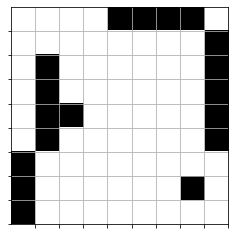

In [34]:
import time
start_time = time.time()

import numpy as np
Game_Grid = []
Game_Grid_Inv = []
rewards = [(7,1),(1,7)]
maze_size = 9
for reward in rewards: 
    
    game_grid = np.zeros((maze_size,maze_size))
    
    game_grid[reward[0]-1, reward[1]-1] = 1  #State 1
    game_grid[reward[0]-1, reward[1]] = 2  #State 2
    game_grid[reward[0]-1, reward[1]+1] = 3  #State 3
    game_grid[reward[0], reward[1]-1] = 4  #State 4
    game_grid[reward[0], reward[1]+1] = 5  #State 5
    game_grid[reward[0]+1, reward[1]-1] = 6  #State 6
    game_grid[reward[0]+1, reward[1]] = 7  #State 7
    game_grid[reward[0]+1, reward[1]+1] = 8  #State 8
    Game_Grid.append(game_grid) 
    
    game_grid_inv={}

    game_grid_inv[1]=(reward[0]-1,reward[1]-1)
    game_grid_inv[2]=(reward[0]-1,reward[1])
    game_grid_inv[3]=(reward[0]-1,reward[1]+1)
    game_grid_inv[4]=(reward[0],reward[1]-1)
    game_grid_inv[5]=(reward[0],reward[1]+1)
    game_grid_inv[6]=(reward[0]+1,reward[1]-1)
    game_grid_inv[7]=(reward[0]+1,reward[1])
    game_grid_inv[8]=(reward[0]+1,reward[1]+1)
    Game_Grid_Inv.append(game_grid_inv)
    
m = np.sum(Game_Grid[0] > 0)
Trans_Matrix = np.zeros((m, m))
Trans_Matrix[0,1] = .5
Trans_Matrix[0,3] = .5
Trans_Matrix[1,0] = .5
Trans_Matrix[1,2] = .5
Trans_Matrix[2,1] = .5
Trans_Matrix[2,4] = .5
Trans_Matrix[3,0] = .5
Trans_Matrix[3,5] = .5
Trans_Matrix[4,2] = .5
Trans_Matrix[4,7] = .5
Trans_Matrix[5,3] = .5
Trans_Matrix[5,6] = .5
Trans_Matrix[6,5] = .5
Trans_Matrix[6,7] = .5
Trans_Matrix[7,4] = .5
Trans_Matrix[7,6] = .5

from gurobipy import *
from itertools import combinations 
import networkx as nx
import numpy as np

def Manhattan_Distance(x,y):
    return np.abs(x[0]-y[0])+np.abs(x[1]-y[1])

## Construct network
grid_dimension=maze_size
G=nx.Graph()
for i in range(grid_dimension):
    for j in range(grid_dimension):
        G.add_node((i,j))
        
for (i,j) in combinations(G.nodes(),2):
     if Manhattan_Distance(i,j)<=1:
            G.add_edge(i,j)
pos={}
for i in G.nodes():
    pos[i]=(int(i[0]), maze_size-int(i[1]))
    
starting_agent_location=(0,0)
for i in G.nodes():
    G.nodes[i]['current_agent']=False
    for j in range(0,len(rewards)):
        current_adversary = 'current_adversary' + str(j)
        G.nodes[i][current_adversary] = False
        rewardz = 'reward'+ str(j)
        G.nodes[i][rewardz] = False
        possible_adversary = 'possible_adversary' + str(j)
        G.nodes[i][possible_adversary] = False
for j in range(0,len(rewards)):
    rewardz = 'reward'+ str(j)
    G.nodes[rewards[j]][rewardz]=True
    possible_adversary = 'possible_adversary' + str(j)
    G.nodes[rewards[j][0]-1,rewards[j][1]-1][possible_adversary] = True
    G.nodes[rewards[j][0]-1,rewards[j][1]][possible_adversary] = True
    G.nodes[rewards[j][0]-1,rewards[j][1]+1][possible_adversary] = True
    G.nodes[rewards[j][0],rewards[j][1]+1][possible_adversary] = True
    G.nodes[rewards[j][0]+1,rewards[j][1]+1][possible_adversary] = True
    G.nodes[rewards[j][0]+1,rewards[j][1]][possible_adversary] = True
    G.nodes[rewards[j][0]+1,rewards[j][1]-1][possible_adversary] = True
    G.nodes[rewards[j][0],rewards[j][1]-1][possible_adversary] = True
    

G.nodes[starting_agent_location]['current_agent']=True
for j in range(0,len(rewards)):
    current_adversary = 'current_adversary' + str(j)
    G.nodes[rewards[j][0]-1,rewards[j][1]-1][current_adversary]=True
    
starting_agent_location=(0,0)
dest=(maze_size-1,maze_size-1)
T=(maze_size*maze_size)+10
done=False
captured=[False]*len(rewards)
maxReward=100

y = 0
current_agent_location=starting_agent_location
current_adversary_location = ((rewards[y][1]-1,rewards[y][0]-1))
current_time=0
current_adversary_loc = (int(Game_Grid[y][current_adversary_location[1],current_adversary_location[0]]))

#from random import choices
#y = 0
#m = np.sum(Game_Grid[y] > 0)
#obs_trans_matrix = np.zeros((m,m))
#for f in range(0,75):
#    choose=choices(range(0,8), Trans_Matrix[current_adversary_loc-1,:])
#    next_adversary_location=(Game_Grid_Inv[y][choose[0]+1][1],Game_Grid_Inv[y][choose[0]+1][0])
#    next_adversary_loc=int(Game_Grid[y][next_adversary_location[1],next_adversary_location[0]])
#    obs_trans_matrix[current_adversary_loc-1,next_adversary_loc-1] += 1
#    current_adversary_loc = next_adversary_loc
#    current_adversary_location = next_adversary_location
#    
#for i in range(m):
#    if np.sum(obs_trans_matrix[i,:]) != 0:
#        obs_trans_matrix[i, ] = obs_trans_matrix[i, ]/np.sum(obs_trans_matrix[i,:])


import random
from collections import Counter
reward = {}
importance=100000
n_success = 0
total_reward = 0
total_regret = 0

average_agent_heatmap = {}
for j in range(0,maze_size):
    for k in range(0,maze_size):
        average_agent_heatmap[(j,k)] = 1

for e in range(25):
    agent_heatmap = {}
    for j in range(0,maze_size):
        for k in range(0,maze_size):
            agent_heatmap[(j,k)] = 0
    reward[e] = 0
    done=False
    end=False
    captured=[False]*len(rewards)
    current_agent_location=starting_agent_location
    current_adversary_location = []  
    for i in range(0,len(rewards)):
        current_adversary_location.append((rewards[i][1]-1,rewards[i][0]-1))
    current_time=0
    while True:
        #print("Current Time:" + str(current_time))
        ####################
        ##Printing details##
        ####################
        current_adversary_loc = []
        for z in range(0,len(rewards)):
            current_adversary_loc.append(int(Game_Grid[z][current_adversary_location[z][1],current_adversary_location[z][0]]))
        #print("Current agent location: "+str(current_agent_location))
        #print("Current adversary location: "+str(current_adversary_location))
        #print("Current adversary loc:" + str(current_adversary_loc))
        #print("Current time: "+str(current_time))
        
        agent_heatmap[(current_agent_location[1],current_agent_location[0])] -= .2

        for z in range(0,len(rewards)):
            if current_agent_location==current_adversary_location[z]:
                end = True
        
        if end==True:
            break
                
        
        if done==True:
            average_agent_heatmap = Counter(average_agent_heatmap) + Counter(agent_heatmap)
            n_success += 1
            total_reward += reward[e]
            total_regret += (475-reward[e])
            #print(reward[e])
        
            break

        ######################
        ##Setting up rewards##
        ######################
        #print("captured:"+str(captured))
        if all(captured):
            destination=dest
        else:
            #rew = random.choice((np.where(np.array((captured))==False)[0]))
            #print(captured)
            rew = (np.where(np.array((captured))==False)[0])[0]
            destination = (rewards[rew][0],rewards[rew][1])
        #print("destination:"+ str(destination))
        r={}
        for (i,d) in G.nodes(data=True):
            r[i] = 0
        for z in range(0,len(rewards)):
            for (i,d) in G.nodes(data=True):
                if d['reward'+str(z)]==True and not captured[z]:
                    r[i]=maxReward

        ########################
        ##Setting up penalties##
        ########################
        p={}
        for (i,d) in G.nodes(data=True):
            p[i]={}
            p[i][current_time]=0

        for t in range(current_time, T):
            for (i,d) in G.nodes(data=True):
                p[i][t]=0
        for t in range(current_time, T):
            for z in range(0,len(rewards)):
                original_probabilities = np.linalg.matrix_power(obs_trans_matrix, t+1-current_time)[current_adversary_loc[z]-1,] # probabilities using matrix power function 
                #for (i,d) in G.nodes(data=True):
                #    if d['possible_adversary'+str(z)]==True:
                #        p[i][t]=original_probabilities[int(Game_Grid[z][i[1]][i[0]])-1]
                for i, s in enumerate(list(original_probabilities)):
                    if s != 0:
                        p[(Game_Grid_Inv[z][i+1][1],Game_Grid_Inv[z][i+1][0])][t] = original_probabilities[i]
                        
        

        ####################
        ##Setting up model##
        ####################          
        model=Model("model_time"+str(current_time))
        model.setParam('OutputFlag', 0) 
        x={}
        y={}
        for i in G.nodes():
            y[i]={}
            y[i][current_time]=model.addVar(vtype=GRB.BINARY, name="y"+str(i)+","+str(t))
            for t in range(current_time, T):
                y[i][t+1]=model.addVar(vtype=GRB.BINARY,obj=t-r[i]+importance*p[i][t], name="y"+str(i)+","+str(t))
        for (i,j) in G.edges():
            x[i,j]={}
            x[j,i]={}
            for t in range(current_time, T):
                x[i,j][t]=model.addVar(vtype=GRB.BINARY, name="x"+str(i)+","+str(j)+","+str(t))
                x[j,i][t]=model.addVar(vtype=GRB.BINARY, name="x"+str(j)+","+str(i)+","+str(t))


        ################################
        ## Setting up the constraints ##
        model.addConstr(y[current_agent_location[0], current_agent_location[1]][current_time]==1) 
        ################################

        # agent only be at one node at a time
        for t in range(current_time, T):
            #print("time:"+str(t))
            model.addConstr(quicksum(y[i[0],i[1]][t] for i in G.nodes()) <= 1)

        # agent can only be in each node once when planning
        for i in G.nodes():
            model.addConstr(quicksum(y[i[0],i[1]][t] for t in range(current_time,T)) <= 1)

        # The agent can and will only exit from the node it is currently in
        for i in G.nodes():
            for t in range(current_time+1, T):
                model.addConstr(quicksum(x[j,i][t-1] for j in G[i])==y[i][t])

        # When an agent enters a node it must exit it as well
        for i in G.nodes():
            if i!=destination and i!=current_agent_location:
                for t in range(current_time+1, T):
                    model.addConstr(quicksum(x[j,i][t-1] for j in G[i])==quicksum(x[i,j][t] for j in G[i]))#, name=str(i))

        # agent has to move every step
        model.addConstr(quicksum(x[current_agent_location, j][current_time] for j in G[current_agent_location])==1)

        #have to reach destination(might not be needed)
        expr=LinExpr()
        for j in G[destination]:
            for t in range(current_time, T):
                expr+=x[j, destination][t]
        model.addConstr(expr==1)

        #model.write("myModel"+str(current_time)+".lp")

        model.optimize()
        next_location=-1
        for t in range(current_time, T):
            for (i,j) in G.edges():
                if round(x[i,j][t].X)==1:
                    #print(t)
                    #print(i,j)
                    if t==current_time:
                        next_location=j
                if round(x[j,i][t].X)==1:
                    #print(t)
                    #print(j,i)
                    if t==current_time:
                        next_location=i
        for i in G.nodes():
            if y[i][current_time].X==1:
                #print(i)
                continue

        current_agent_location=next_location 

        #print("Next agent location: " + str(next_location))
        for (i,d) in G.nodes(data=True):
            for z in range(0,len(rewards)):
                if d['reward'+str(z)]==True:
                    if str(i)==str(next_location):
                        captured[z]=True
                        #print("Just captured reward " + str(z))



        current_time+=1

        ### THIS IS THE PART THAT NEEDS UPDATING ########
        next_adversary_location = []
        for z in range(0,len(rewards)):
            choose=choices(range(0,8), Trans_Matrix[current_adversary_loc[z]-1,:])
            #print(choose)
            next_adversary_location.append((Game_Grid_Inv[z][choose[0]+1][1],Game_Grid_Inv[z][choose[0]+1][0]))
        ########################################

        for z in range(0,len(rewards)):
            current_adversary_location[z]=next_adversary_location[z]
            #print("Next adversary location: " + str(next_adversary_location))

        
        if current_agent_location in current_adversary_location:
            reward[e] -= 1000
        elif current_agent_location in rewards:
            if agent_heatmap[(current_agent_location[1],current_agent_location[0])] == 0:
                reward[e] += 200
            else:
                reward[e] -= 1
        elif current_agent_location == destination:
            reward[e] += 100
        else:
            reward[e] -= 1
            
        

        if current_agent_location==dest:
            #if captured == True:
                #print("Won Game")
                #zprint(reward)
            done=True

            
print("time: ",time.time()-start_time)            
import matplotlib.pyplot as plt
plt.grid('on')
n = maze_size
ax = plt.gca()
ax.set_xticks(np.arange(0.5, n, 1))
ax.set_yticks(np.arange(0.5, n, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
canvas = maze = np.full(
                        shape=(maze_size,maze_size),
                        fill_value=1,
                        dtype=np.int)
for cell in average_agent_heatmap:
    canvas[cell] = average_agent_heatmap[cell]
img1 = plt.imshow(canvas, interpolation='none', cmap='gray', vmin=0, vmax=1)
print("number of successes",n_success)
print("average reward:",total_reward/n_success)
print("average regret:",475-(total_reward/n_success))

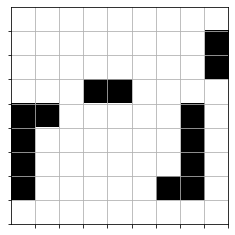

In [11]:
import matplotlib.pyplot as plt
plt.grid('on')
n = maze_size
ax = plt.gca()
ax.set_xticks(np.arange(0.5, n, 1))
ax.set_yticks(np.arange(0.5, n, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
canvas = maze = np.full(
                        shape=(maze_size,maze_size),
                        fill_value=1,
                        dtype=np.int)
for cell in average_agent_heatmap:
    canvas[cell] = average_agent_heatmap[cell]
img1 = plt.imshow(canvas, interpolation='none', cmap='gray', vmin=0, vmax=1)